**Projected subgradient for L1 minimization**

This code implemented algorithm 2.2 on page 60 of the book 'High-Dimensional Data Analysis with Low-Dimensional Models: Principles, Computation, and Applications' by JOHN WRIGHT and YI MA 

In [ ]:
import numpy as np
import random
n=100
m=n/2

def PSG(A,y,Gamma,xbar,n_iter=100000, eps=0.000001):
  L0_norm=0
  x=np.zeros(xbar.shape)
  for i in range(n_iter):
    x_new=xbar+np.dot(Gamma,(x-1/(i+1)*np.sign(x)))
    if np.linalg.norm(x-x_new)<=eps:
      # print('Done')
      for j in range(len(x_new)):
        if x_new[j]>=0.001:
          L0_norm=L0_norm+1
      # print('L0_norm is %d' % L0_norm)
      break
    x=x_new
  return x


def myexperiment(n,m,k,Num_sample=50):
  succed=0
  for i in range(Num_sample):
    L0_norm=0
    A=np.random.rand(np.int(m),np.int(n))
    x0=np.random.rand(np.int(n),1)
    sampled_list = random.sample(range(np.int(n)), np.int(n-k))
    for i in iter(sampled_list):
      x0[i]=0
    y=np.dot(A,x0)
    Gamma = np.identity(np.int(n)) - np.dot(np.transpose(A), np.dot(( np.linalg.inv(np.dot(A,np.transpose(A)))) ,A))
    xbar  = np.dot( np.dot(np.transpose(A),np.linalg.inv(np.dot(A,np.transpose(A)))), y)
    x = PSG(A,y,Gamma,xbar,n_iter=100000, eps=0.001)
    for j in range(len(x)):
      if x[j]>=0.001:
        L0_norm=L0_norm+1
    if np.linalg.norm(x-x0)<=0.01:
      succed=succed+1
  print(succed)
  return succed

success_set=[]
for k in range(n):
  success_set.append(myexperiment(n,m,k))

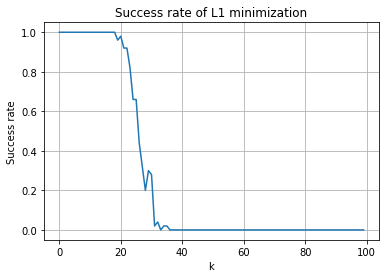

In [20]:
import matplotlib.pyplot as plt
k = np.arange(0 , n, 1)
success_set[:] = [x/50 for x in success_set]

fig, ax = plt.subplots()
ax.plot(k, success_set)
ax.set(xlabel='k', ylabel='Success rate',
       title='Success rate of L1 minimization')
ax.grid()

fig.savefig("test.png")
plt.show()